In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Activation, MaxPooling1D, Flatten
from keras.utils import np_utils

In [2]:
root_directory = 'C:/Users/saisr/OneDrive/Desktop/random forest model/EMG Physical Action Data Set'

# Use glob to find all CSV files in the subfolders
csv_files = glob.glob(os.path.join(root_directory, '*/*.csv'))

# Concatenate all CSV files into a single DataFrame
dataset = pd.concat(map(pd.read_csv, csv_files))
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.dropna(axis = 0, inplace = True)

In [3]:
# Dividing into independent feature matrix & dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:

# Encode the labels
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)

In [5]:
# Feature Scaling - Standardization
sc = StandardScaler()
X = sc.fit(X).transform(X)

# Reshape the input data for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

In [6]:
# Building the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(y.shape[1], activation='softmax'))

In [7]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Splitting the dataset into Training & Testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
# Training the model
model.fit(X_train, y_train, epochs=60, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/60
8722/8722 [==============================] - 46s 5ms/step - loss: 0.4524 - accuracy: 0.7965 - val_loss: 0.4282 - val_accuracy: 0.8117
Epoch 2/60
8722/8722 [==============================] - 44s 5ms/step - loss: 0.4227 - accuracy: 0.8147 - val_loss: 0.4258 - val_accuracy: 0.8141
Epoch 3/60
8722/8722 [==============================] - 47s 5ms/step - loss: 0.4171 - accuracy: 0.8184 - val_loss: 0.4164 - val_accuracy: 0.8200
Epoch 4/60
8722/8722 [==============================] - 45s 5ms/step - loss: 0.4133 - accuracy: 0.8209 - val_loss: 0.4126 - val_accuracy: 0.8225
Epoch 5/60
8722/8722 [==============================] - 50s 6ms/step - loss: 0.4104 - accuracy: 0.8223 - val_loss: 0.4153 - val_accuracy: 0.8173
Epoch 6/60
8722/8722 [==============================] - 66s 8ms/step - loss: 0.4086 - accuracy: 0.8237 - val_loss: 0.4224 - val_accuracy: 0.8189
Epoch 7/60
8722/8722 [==============================] - 68s 8ms/step - loss: 0.4071 - accuracy: 0.8246 - val_loss: 0.4081 - val_ac

In [9]:
# Evaluating the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy * 100))

7476/7476 [==============================] - 19s 3ms/step - loss: 0.3912 - accuracy: 0.8338
Accuracy: 83.38


7476/7476 [==============================] - 16s 2ms/step


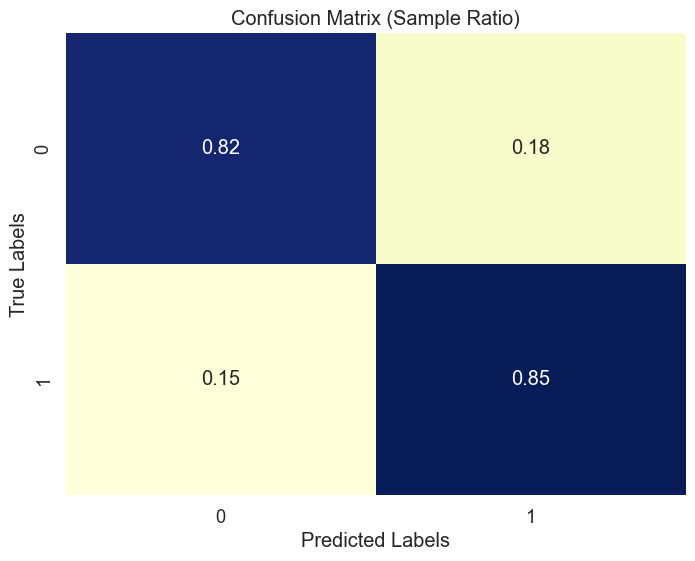

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you've already trained your model and have it ready

# Step 1: Make predictions on the test dataset
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Step 2: Compute the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Step 3: Calculate the ratio of sample_out/total_samples
confusion_ratio = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

# Step 4: Use Seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed

# Create a heatmap
sns.heatmap(confusion_ratio, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)

# Set axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Sample Ratio)")
plt.savefig('cmcnn.png')
# Show the plot
plt.show()